# Análisis exploratorio de incidencia delictiva en México

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [131]:
df = pd.read_csv('data/delitos.csv')

#### Ejercicio 1: Elige 3 estados de la república y grafica una serie de tiempo de la frecuencia abosluta de homicidios dolosos de enero 2015 a julio 2019 en estas tres entidades

In [132]:
df[['entidad', 'anio', 'tipo_de_delito','nombre_mes', 'fecha','frecuencia']]

,entidad,anio,tipo_de_delito,nombre_mes,fecha,frecuencia
0,Aguascalientes,2015,Aborto,abril,2015-04-01,0.0
1,Aguascalientes,2015,Aborto,agosto,2015-08-01,0.0
2,Aguascalientes,2015,Aborto,diciembre,2015-12-01,0.0
3,Aguascalientes,2015,Aborto,enero,2015-01-01,0.0
4,Aguascalientes,2015,Aborto,febrero,2015-02-01,3.0
...,...,...,...,...,...,...
153595,Zacatecas,2024,Violencia familiar,marzo,2024-03-01,319.0
153596,Zacatecas,2024,Violencia familiar,mayo,2024-05-01,355.0
153597,Zacatecas,2024,Violencia familiar,noviembre,2024-11-01,0.0
153598,Zacatecas,2024,Violencia familiar,octubre,2024-10-01,0.0


In [133]:
df = df[['entidad', 'anio', 'tipo_de_delito', 'nombre_mes', 'fecha','frecuencia']]

In [134]:
df['fecha'] = pd.to_datetime(df['fecha'])

In [187]:
df= df[
    (df['entidad'].isin(['Oaxaca', 'Guanajuato', 'Aguascalientes'])) &
    (df['tipo_de_delito'] == 'Homicidio') &
    (df['fecha'] >= fecha_inicio) &
    (df['fecha'] <= fecha_final)
    ].drop_duplicates().sort_values('fecha')

In [147]:
pivot = df.pivot(index='fecha', columns='entidad', values='frecuencia')


In [153]:
df= pivot
df

entidad,Aguascalientes,Guanajuato,Oaxaca
fecha,,,
2015-01-01,22.0,205.0,0.0
2015-02-01,20.0,167.0,105.0
2015-03-01,14.0,172.0,0.0
2015-04-01,21.0,194.0,0.0
2015-05-01,18.0,208.0,129.0
2015-06-01,16.0,181.0,0.0
2015-07-01,16.0,199.0,0.0
2015-08-01,14.0,227.0,79.0
2015-09-01,27.0,212.0,0.0


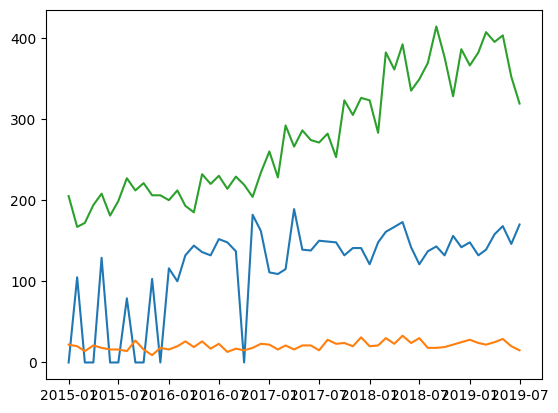

In [162]:
plt.plot(df.index, df['Oaxaca'])
plt.plot(df.index, df['Aguascalientes'])
plt.plot(df.index, df['Guanajuato'])

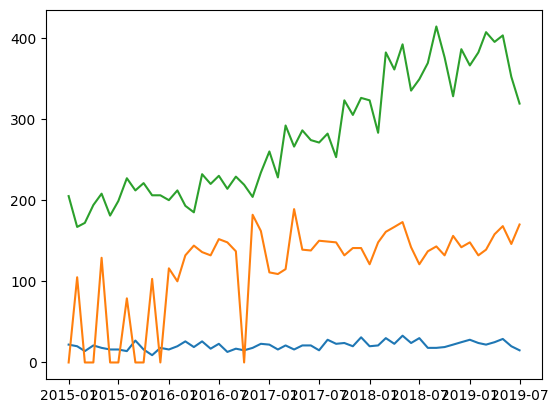

In [160]:
for col in ['Aguascalientes', 'Oaxaca', 'Guanajuato']:
    plt.plot(df.index, df[col])

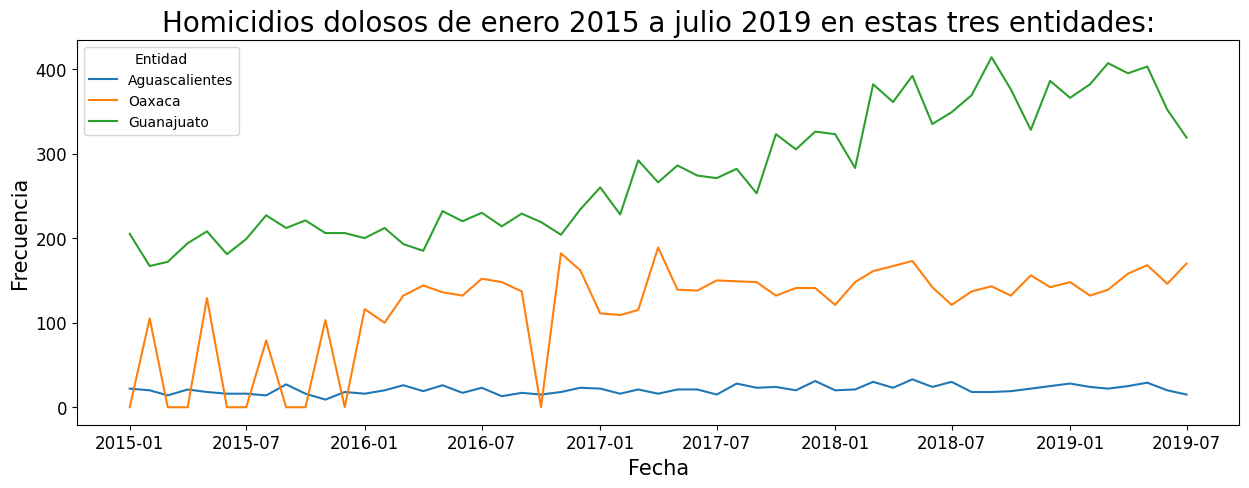

In [179]:
fig = plt.subplots(figsize=(15, 5))
for col in ['Aguascalientes', 'Oaxaca', 'Guanajuato']:
    plt.plot(df.index, df[col], label=col)
plt.title('Homicidios dolosos de enero 2015 a julio 2019 en estas tres entidades:', fontsize=20)
plt.xlabel('Fecha', fontsize = 15)
plt.ylabel('Frecuencia',fontsize= 15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Entidad')
plt.show()

In [330]:
df = pd.read_csv('data/datos_delitos.csv', encoding='ISO-8859-1')
def limpiar_columnas(df):
    columnas_limpias = []
    for col in df.columns:
        # convertir a minusculas, reemplazar espacios por guiones bajos y eliminar caracteres especiales
        col = col.lower().replace(" ", "_").replace("ñ", "ni").replace(".", "").replace("á", "a").replace("é", "e").replace("í","i").replace("ó", "o").replace("ú", "u")
        columnas_limpias.append(col)
    
    df.columns = columnas_limpias
    
    return df
df = limpiar_columnas(df)
df = df[['anio', 'clave_ent', 'entidad', 'tipo_de_delito', 'subtipo_de_delito', 'modalidad','enero', 'febrero', 'marzo', 'abril', 'mayo', 'junio', 'julio', 'agosto', 'septiembre', 'octubre', 'noviembre', 'diciembre']]
df= datos_long = df.melt(id_vars=['anio', 'clave_ent', 'entidad','tipo_de_delito', 'subtipo_de_delito', 'modalidad'], var_name='nombre_mes', value_name='frecuencia')
df.dropna(inplace=True)

#### Ejercicio 2: Contetas las siguientes  preguntas:
1. ¿Cuántos homicidios dolosos hubo en Colima en el 2018?
2. ¿Cuantos robos de vehículo automotor ha habido en el 2019?
3. Obten la suma de homicidos dolosos y feminidios en toda la República Mexicana en cada año.
4. ¿En qué mes y en qué municipio ha ocurrido el mayor número de feminicidios?
5. ¿En qué año y en qué estado ha ocurrido el mayor número de feminicidios?

In [332]:
#¿Cuántos homicidios dolosos hubo en Colima en el 2018?
homicidios_colima= df[
    (df['entidad']== 'Colima') &
    (df['anio']==2018) &
    (df['subtipo_de_delito']== "Homicidio doloso")
    ]
print ('En Colima el numero de homicidios dolosos en el 2018 fue de:', homicidios_colima.frecuencia.sum())

En Colima el numero de homicidios dolosos en el 2018 fue de: 617.0


In [333]:
#¿Cuantos robos de vehículo automotor ha habido en el 2019?
robos_2019 = df[
    (df['anio']==2019) &
    (df['subtipo_de_delito']== 'Robo de vehículo automotor')
     ]
print ('El robo de vehiculos automotor en la republica mexicana en 2019 fue de:',robos_2019.frecuencia.sum())

El robo de vehiculos automotor en la republica mexicana en 2019 fue de: 187661.0


In [334]:
#Obten la suma de homicidos dolosos y feminidios en toda la República Mexicana en cada año.
def total_x_anio(num):
    df_filtrado= df[
    (df['anio'] == num) &
    (df['subtipo_de_delito'].isin(['Feminicidio', 'Homicidio doloso']))
    ]
    return df_filtrado.frecuencia.sum()

print ('La suma de los homicidios dolosos y feminicidios en toda la republica mexicana en cada año es de:' )
print ('2015:',total_x_anio(2015))
print ('2016:',total_x_anio(2016))
print ('2017:',total_x_anio(2017))
print ('2018:',total_x_anio(2018))
print ('2019:',total_x_anio(2019))
print ('2020:',total_x_anio(2020))
print ('2021:',total_x_anio(2021))
print ('2022:',total_x_anio(2022))
print ('2023:',total_x_anio(2023))
print ('2024:',total_x_anio(2024))

La suma de los homicidios dolosos y feminicidios en toda la republica mexicana en cada año es de:
2015: 16532.0
2016: 20756.0
2017: 25777.0
2018: 29995.0
2019: 30445.0
2020: 29786.0
2021: 29263.0
2022: 27240.0
2023: 26119.0
2024: 13255.0


In [371]:
#¿En qué mes y en qué municipio ha ocurrido el mayor número de feminicidios?
df_exercise_4= df.copy()
df_exercise_4 =df_exercise_4[['entidad', 'tipo_de_delito', 'nombre_mes', 'frecuencia']]
entidad_max=df_exercise_4[(df_exercise_4['tipo_de_delito'] == 'Feminicidio')].max()
print ('El estado y mes con mayor numero de Feminicidios ocurridos en Mexico es:')
entidad_max


El estado y mes con mayor numero de Feminicidios ocurridos en Mexico es:


entidad             Zacatecas
tipo_de_delito    Feminicidio
nombre_mes         septiembre
frecuencia               16.0
dtype: object

In [405]:
#¿En qué año y en qué estado ha ocurrido el mayor número de feminicidios?
df_5 = df.copy()
filtro = df_5[(df_5['tipo_de_delito']=='Feminicidio')]
totales_por_anio = filtro.groupby(['anio','entidad'])['frecuencia'].sum()
idx = totales_por_anio.idxmax()
print ('El año donde mas feminicidios ocurrieron fue en:',idx[0], ' en el estado de:', idx[1],'con una frecuencia de:', totales_por_anio.max())

El año donde mas feminicidios ocurrieron fue en: 2020  en el estado de: México con una frecuencia de: 151.0


#### Ejercicio 3: Haz una gráfica de pastel de tipos de delito. Deberás crear una gráfica para cada año. Utilzia la función subplots de matplotlib

In [505]:
df_3= df.copy()
df_3= df_3[['anio', 'tipo_de_delito','frecuencia']]
def grafico(num):
    filtro = df_3[(df_3['anio']==num)]
    return filtro.groupby(['tipo_de_delito'])['frecuencia'].sum()
print (grafico(2015))

tipo_de_delito
Aborto                                                                              544.0
Abuso de confianza                                                                20013.0
Abuso sexual                                                                      11980.0
Acoso sexual                                                                       1109.0
Allanamiento de morada                                                            12326.0
Amenazas                                                                          68007.0
Contra el medio ambiente                                                           1184.0
Corrupción de menores                                                              1940.0
Daño a la propiedad                                                              120246.0
Delitos cometidos por servidores públicos                                         11821.0
Despojo                                                                           216

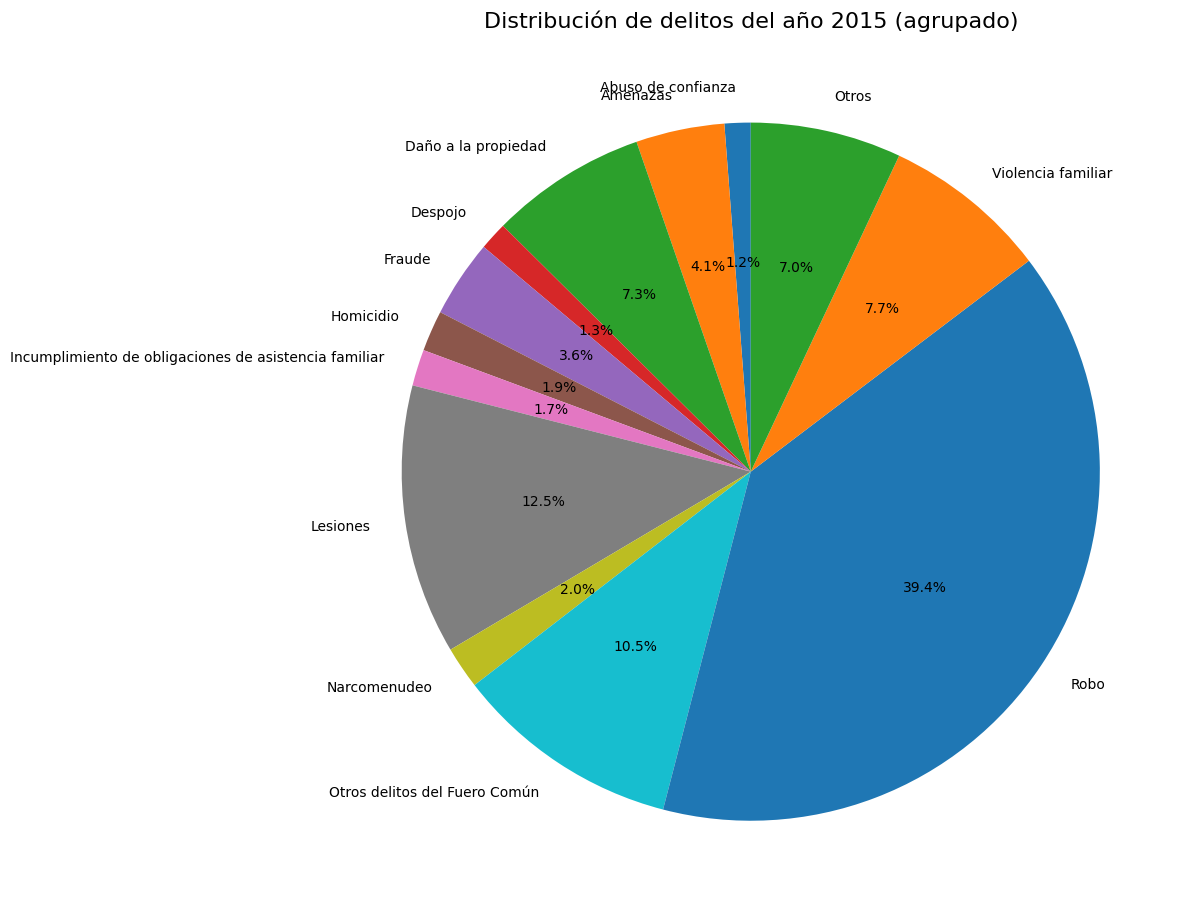

In [506]:
umbral = 0.01

totales_normalizado = grafico(2015) / grafico(2015).sum()

totales_mod = (grafico(2015)).copy()
totales_mod[totales_normalizado < umbral] = 0
otros = totales[totales_normalizado < umbral].sum()

totales_mod = totales_mod[totales_mod > 0]
totales_mod["Otros"] = otros

plt.figure(figsize=(12, 12))

totales_mod.plot.pie(
    autopct='%1.1f%%',
    textprops={'fontsize': 10},
    startangle=90
)

plt.ylabel('')
plt.title('Distribución de delitos del año 2015 (agrupado)', fontsize=16)

plt.tight_layout()
plt.show()


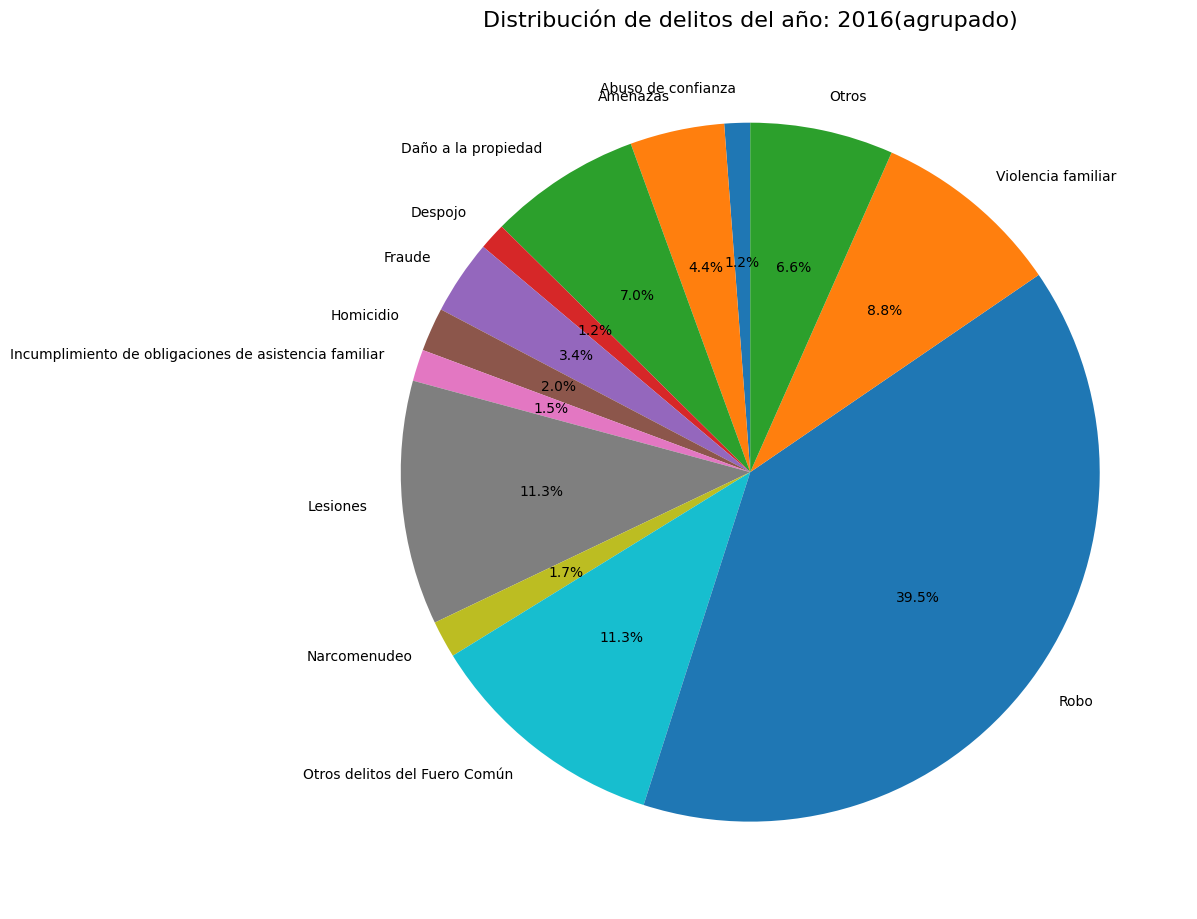

In [509]:
umbral = 0.01

totales_normalizado = grafico(2016) / grafico(2016).sum()

totales_mod = (grafico(2016)).copy()
totales_mod[totales_normalizado < umbral] = 0
otros = totales[totales_normalizado < umbral].sum()

totales_mod = totales_mod[totales_mod > 0]
totales_mod["Otros"] = otros

plt.figure(figsize=(12, 12))

totales_mod.plot.pie(
    autopct='%1.1f%%',
    textprops={'fontsize': 10},
    startangle=90
)

plt.ylabel('')
plt.title('Distribución de delitos del año: 2016(agrupado)', fontsize=16)

plt.tight_layout()
plt.show()


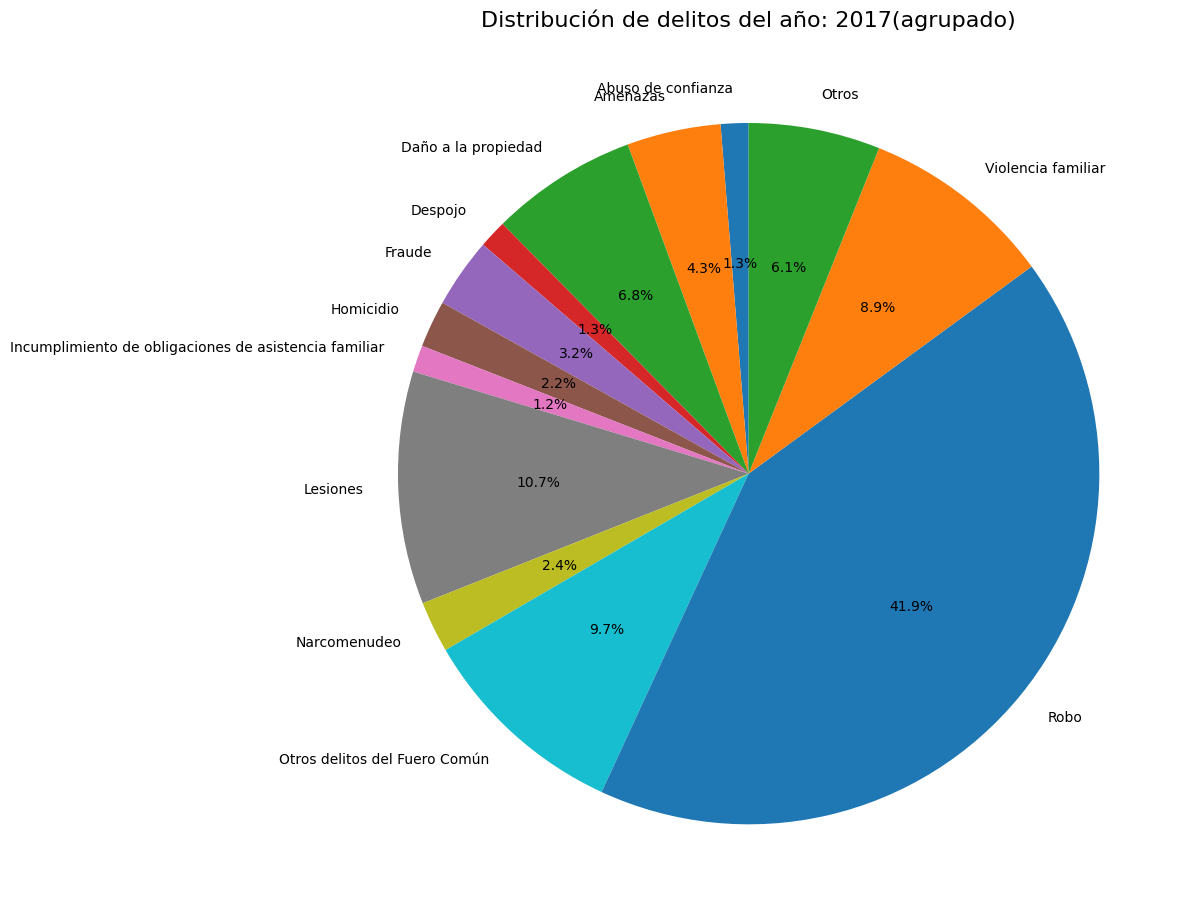

In [510]:
umbral = 0.01

totales_normalizado = grafico(2017) / grafico(2017).sum()

totales_mod = (grafico(2017)).copy()
totales_mod[totales_normalizado < umbral] = 0
otros = totales[totales_normalizado < umbral].sum()

totales_mod = totales_mod[totales_mod > 0]
totales_mod["Otros"] = otros

plt.figure(figsize=(12, 12))

totales_mod.plot.pie(
    autopct='%1.1f%%',
    textprops={'fontsize': 10},
    startangle=90
)

plt.ylabel('')
plt.title('Distribución de delitos del año: 2017(agrupado)', fontsize=16)

plt.tight_layout()
plt.show()

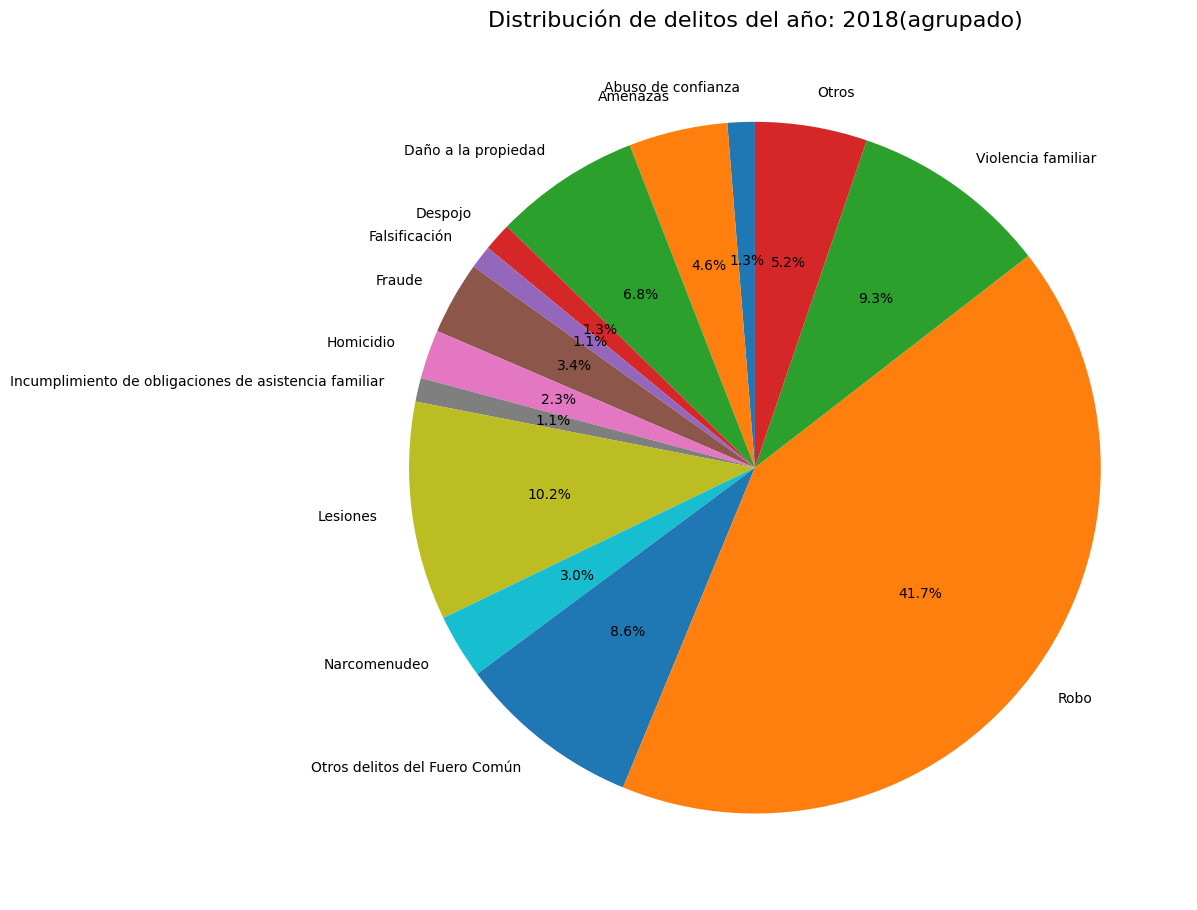

In [512]:
umbral = 0.01

totales_normalizado = grafico(2018) / grafico(2018).sum()

totales_mod = (grafico(2018)).copy()
totales_mod[totales_normalizado < umbral] = 0
otros = totales[totales_normalizado < umbral].sum()

totales_mod = totales_mod[totales_mod > 0]
totales_mod["Otros"] = otros

plt.figure(figsize=(12, 12))

totales_mod.plot.pie(
    autopct='%1.1f%%',
    textprops={'fontsize': 10},
    startangle=90
)

plt.ylabel('')
plt.title('Distribución de delitos del año: 2018(agrupado)', fontsize=16)

plt.tight_layout()
plt.show()

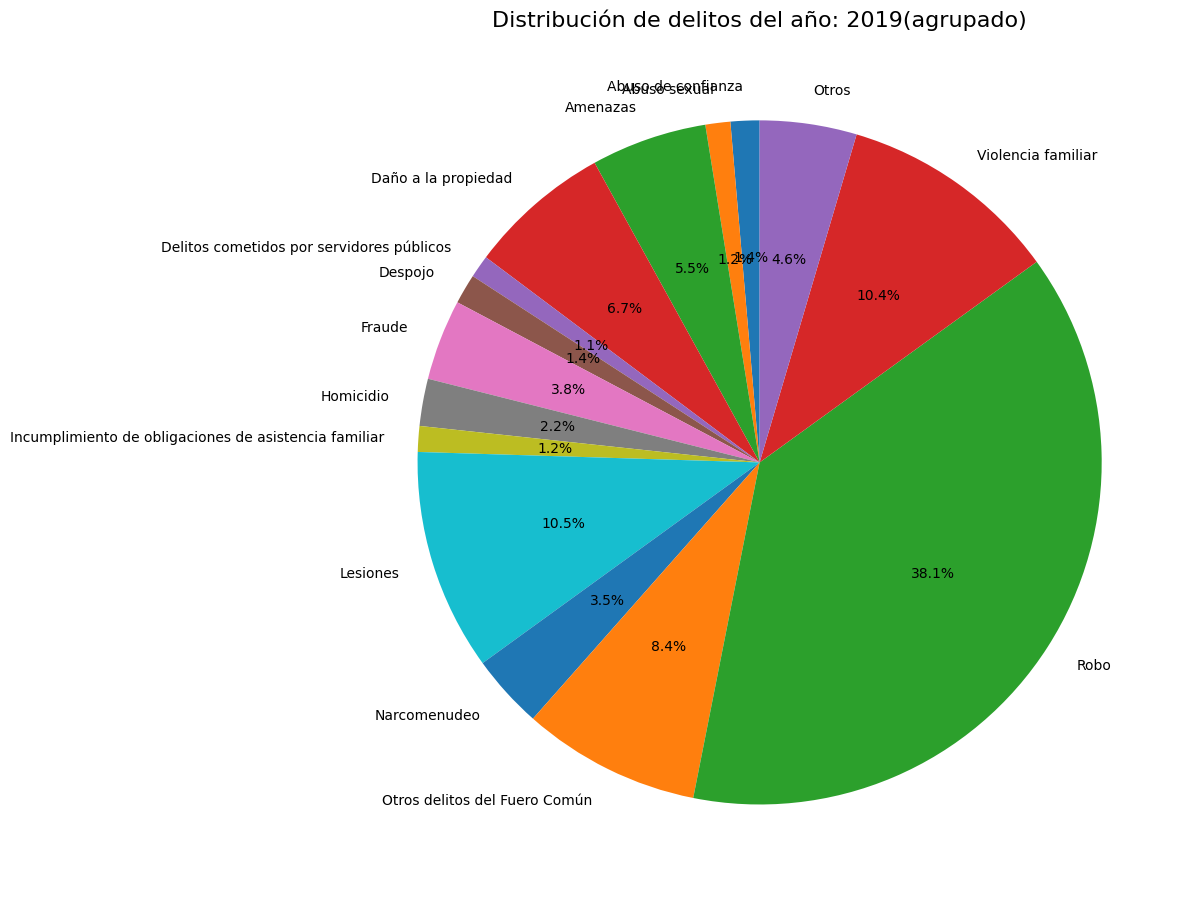

In [513]:
umbral = 0.01

totales_normalizado = grafico(2019) / grafico(2019).sum()

totales_mod = (grafico(2019)).copy()
totales_mod[totales_normalizado < umbral] = 0
otros = totales[totales_normalizado < umbral].sum()

totales_mod = totales_mod[totales_mod > 0]
totales_mod["Otros"] = otros

plt.figure(figsize=(12, 12))

totales_mod.plot.pie(
    autopct='%1.1f%%',
    textprops={'fontsize': 10},
    startangle=90
)

plt.ylabel('')
plt.title('Distribución de delitos del año: 2019(agrupado)', fontsize=16)

plt.tight_layout()
plt.show()

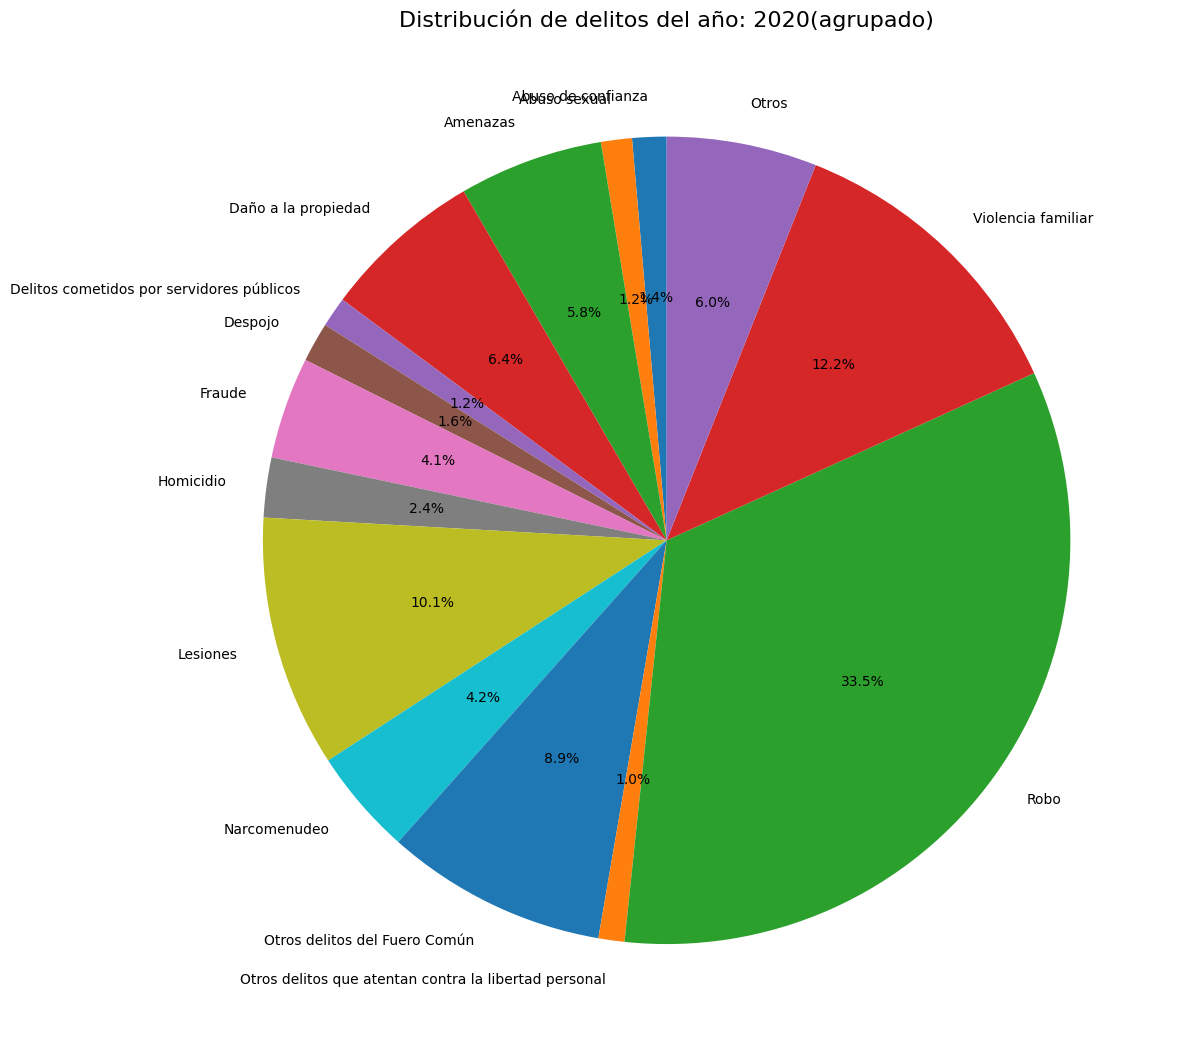

In [514]:
umbral = 0.01

totales_normalizado = grafico(2020) / grafico(2020).sum()

totales_mod = (grafico(2020)).copy()
totales_mod[totales_normalizado < umbral] = 0
otros = totales[totales_normalizado < umbral].sum()

totales_mod = totales_mod[totales_mod > 0]
totales_mod["Otros"] = otros

plt.figure(figsize=(12, 12))

totales_mod.plot.pie(
    autopct='%1.1f%%',
    textprops={'fontsize': 10},
    startangle=90
)

plt.ylabel('')
plt.title('Distribución de delitos del año: 2020(agrupado)', fontsize=16)

plt.tight_layout()
plt.show()

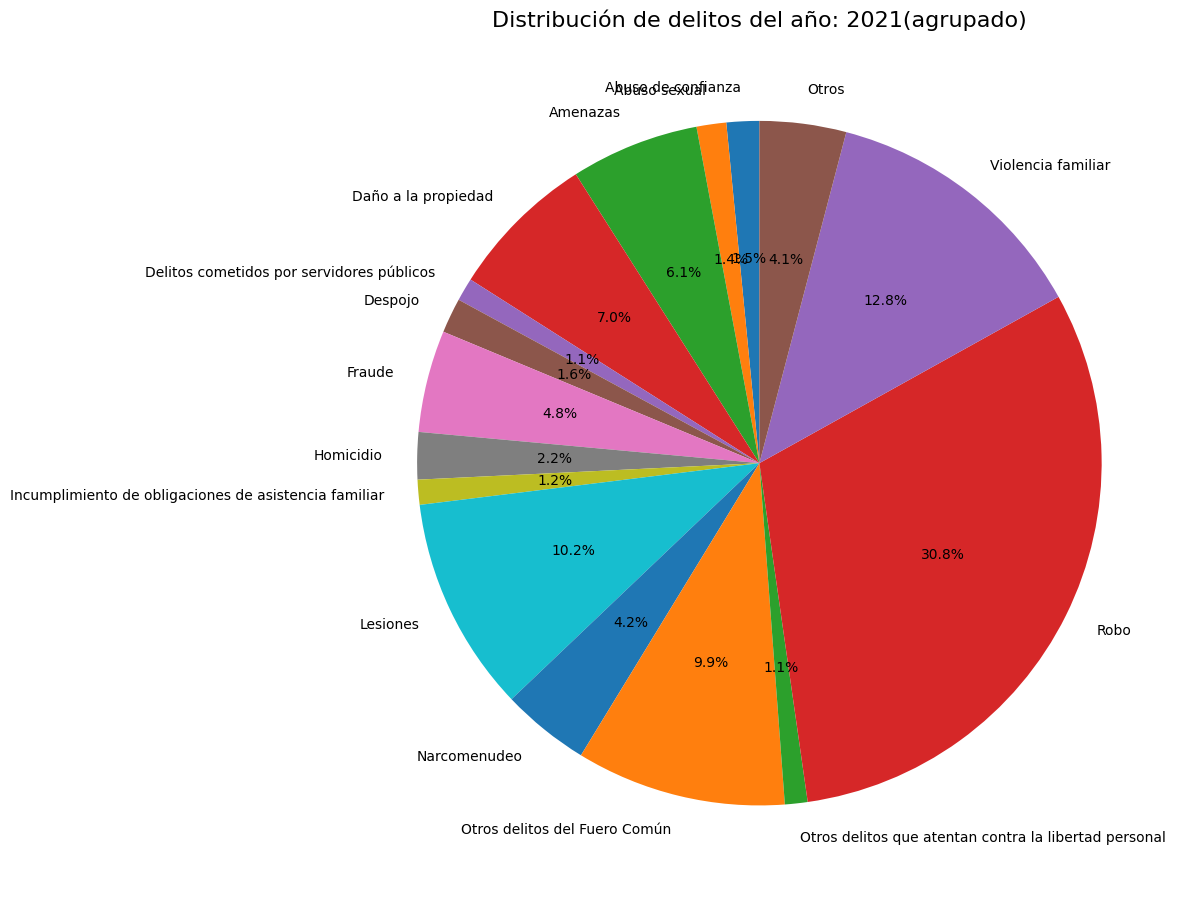

In [515]:
umbral = 0.01

totales_normalizado = grafico(2021) / grafico(2021).sum()

totales_mod = (grafico(2021)).copy()
totales_mod[totales_normalizado < umbral] = 0
otros = totales[totales_normalizado < umbral].sum()

totales_mod = totales_mod[totales_mod > 0]
totales_mod["Otros"] = otros

plt.figure(figsize=(12, 12))

totales_mod.plot.pie(
    autopct='%1.1f%%',
    textprops={'fontsize': 10},
    startangle=90
)

plt.ylabel('')
plt.title('Distribución de delitos del año: 2021(agrupado)', fontsize=16)

plt.tight_layout()
plt.show()

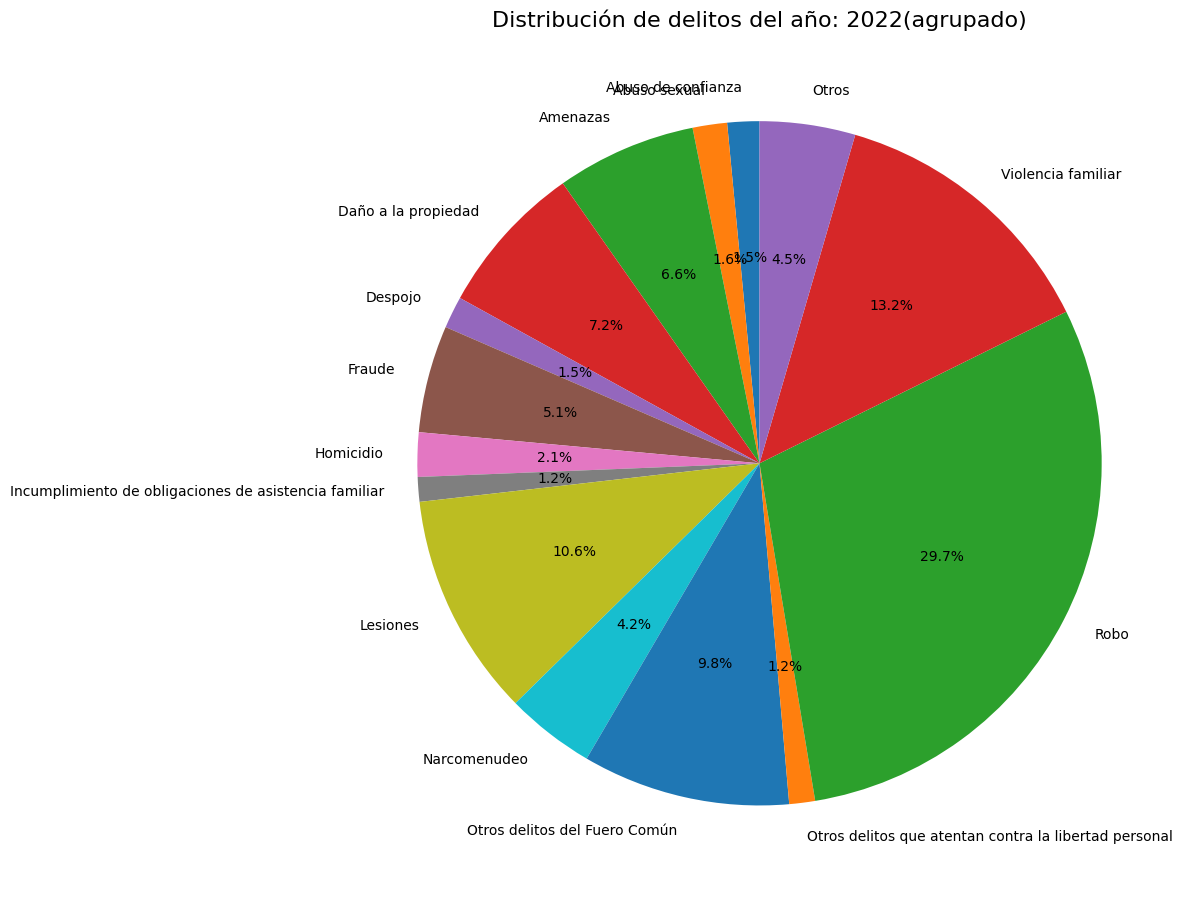

In [516]:
umbral = 0.01

totales_normalizado = grafico(2022) / grafico(2022).sum()

totales_mod = (grafico(2022)).copy()
totales_mod[totales_normalizado < umbral] = 0
otros = totales[totales_normalizado < umbral].sum()

totales_mod = totales_mod[totales_mod > 0]
totales_mod["Otros"] = otros

plt.figure(figsize=(12, 12))

totales_mod.plot.pie(
    autopct='%1.1f%%',
    textprops={'fontsize': 10},
    startangle=90
)

plt.ylabel('')
plt.title('Distribución de delitos del año: 2022(agrupado)', fontsize=16)

plt.tight_layout()
plt.show()

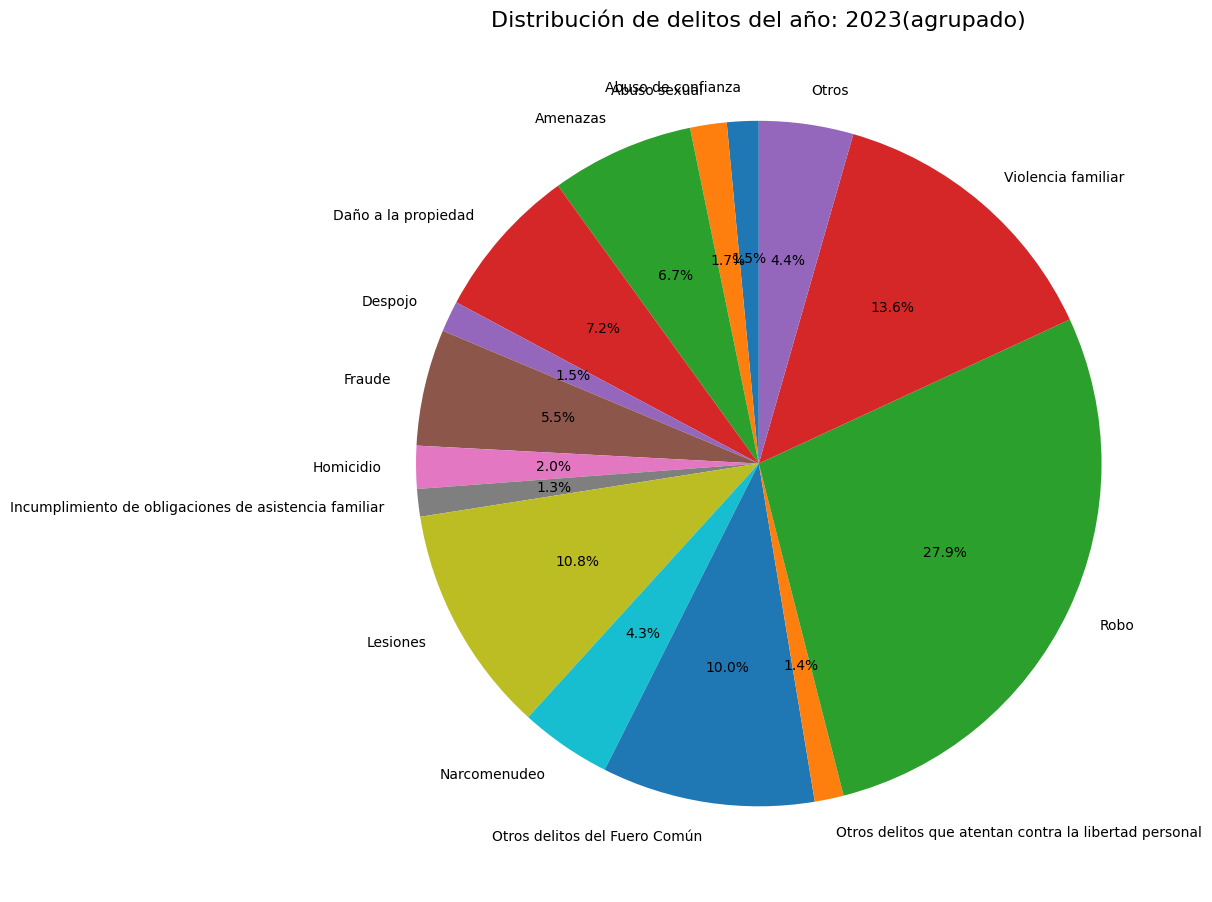

In [517]:
umbral = 0.01

totales_normalizado = grafico(2023) / grafico(2023).sum()

totales_mod = (grafico(2023)).copy()
totales_mod[totales_normalizado < umbral] = 0
otros = totales[totales_normalizado < umbral].sum()

totales_mod = totales_mod[totales_mod > 0]
totales_mod["Otros"] = otros

plt.figure(figsize=(12, 12))

totales_mod.plot.pie(
    autopct='%1.1f%%',
    textprops={'fontsize': 10},
    startangle=90
)

plt.ylabel('')
plt.title('Distribución de delitos del año: 2023(agrupado)', fontsize=16)

plt.tight_layout()
plt.show()

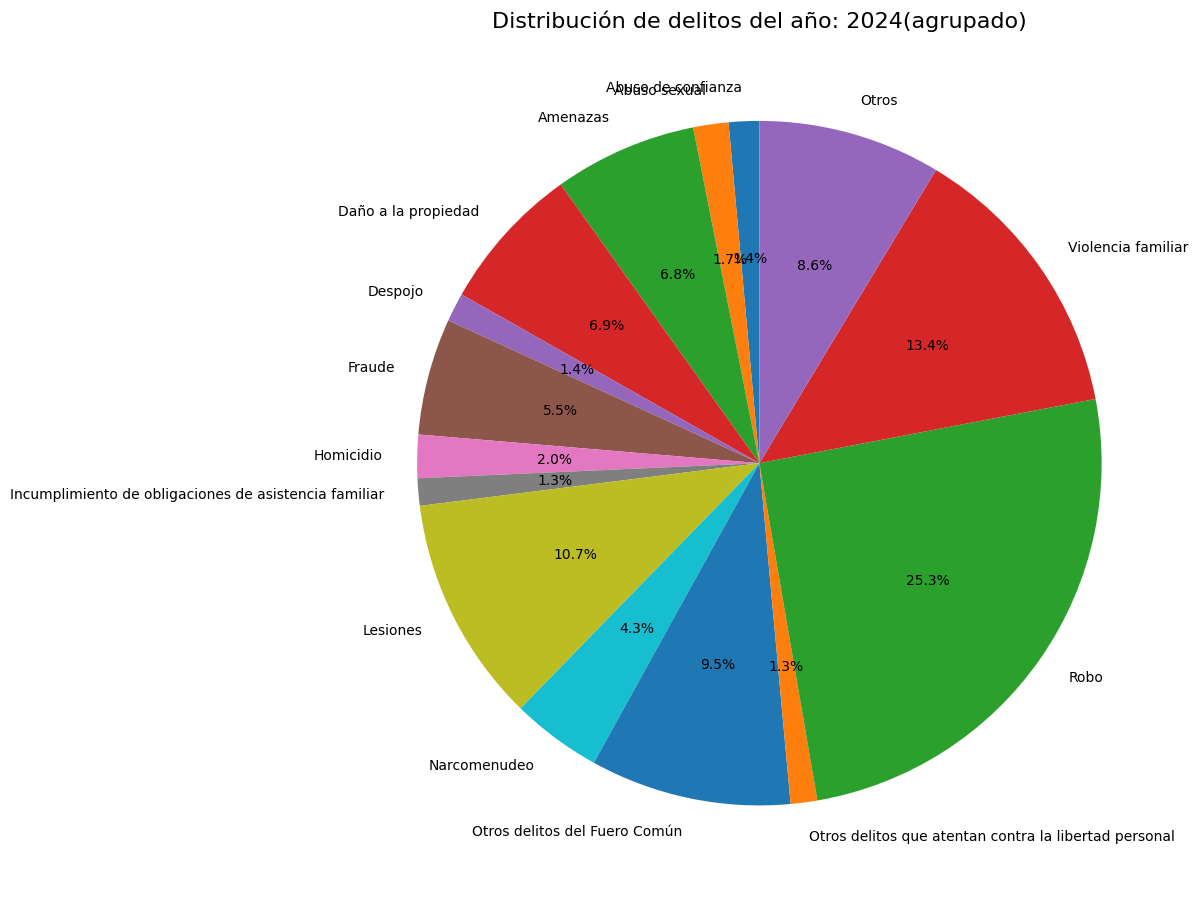

In [518]:
umbral = 0.01

totales_normalizado = grafico(2024) / grafico(2024).sum()

totales_mod = (grafico(2024)).copy()
totales_mod[totales_normalizado < umbral] = 0
otros = totales[totales_normalizado < umbral].sum()

totales_mod = totales_mod[totales_mod > 0]
totales_mod["Otros"] = otros

plt.figure(figsize=(12, 12))

totales_mod.plot.pie(
    autopct='%1.1f%%',
    textprops={'fontsize': 10},
    startangle=90
)

plt.ylabel('')
plt.title('Distribución de delitos del año: 2024(agrupado)', fontsize=16)

plt.tight_layout()
plt.show()

---
#### Calcula la tasa por 100,000 habitantes
##### Tasa por 100,000 habitantes
Mostrar el total de delitos en una entidad no nos sirve de mucho. Es mucho más útil calcular la tasa de incidencia delictiva por cada 100,000 habitantes

$$
tasa = \frac{delitos\space totales}{población} \times 100,000
$$

Esta tasa la podemos anualizar multiplicándola por un factor de 12
$$
tasa\space anualizada = tasa \times 12
$$

Población por entidad federativa según [la encuesta intercensal 2015](https://www.inegi.org.mx/programas/intercensal/2015/)

No tienes que descargar nada. Ya están los datos en la carpeta data

In [519]:
pobs = pd.read_csv('data/poblacion_entidades_2015.csv', encoding='iso-8859-1', sep=";")
pobs = pobs[['Cve_Entidad', 'Entidad', 'Poblacion']]
pobs = pobs.rename(columns={'Cve_Entidad':'clave_entidad', 'Entidad':'entidad', 'Poblacion':'poblacion'})
pobs.head()

,clave_entidad,entidad,poblacion
0,1,Aguascalientes,1312544.0
1,2,Baja California,3315766.0
2,3,Baja California Sur,712029.0
3,4,Campeche,899931.0
4,5,Coahuila de Zaragoza,5217908.0


In [603]:
df_5 = df.copy()
df_5= df_5[['anio','entidad','tipo_de_delito','frecuencia']]
def cantidades(estado):
    cantidad = pobs[(pobs['entidad']==estado)]
    return cantidad['poblacion']
    
poblacion = cantidades('Oaxaca')
poblacion[19]

np.float64(3967889.0)

In [606]:
def filtrado(estado,poblacion):
    filtro = df_5[(df_5['anio']==2015)&(df_5['entidad']==estado)]
    
    agrupado = filtro.groupby(['entidad','tipo_de_delito'])['frecuencia'].sum()
    
    delitos_totales = filtro['frecuencia'].sum()
    
    tasa = delitos_totales / poblacion * 100000
    
    tasa_anual = tasa*12
    
    return print ('La tasa de delitos de la entidad de Oaxaca del año 2015 es de:',tasa[19], 'mientras que la tasa anual es de:',tasa_anual[19])
filtrado('Oaxaca',poblacion)


La tasa de delitos de la entidad de Oaxaca del año 2015 es de: 154.41460181975856 mientras que la tasa anual es de: 1852.9752218371027
